In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
elementary_1=pd.read_csv('test_1_elementary.csv')
elementary_1=elementary_1[elementary_1.time_finished > 0]
elementary_1=elementary_1.assign(type='elementory')
elementary_1['time_on_task(sec)'] = (elementary_1['time_finished']-elementary_1['time_given'])/1000

basic_1=pd.read_csv('test_1_basic.csv')
basic_1=basic_1[basic_1.time_finished > 0]
basic_1=basic_1.assign(type='basic')
basic_1['time_on_task(sec)'] = (basic_1['time_finished']-basic_1['time_given'])/1000 #столбец:время от появления задачи в стеке до возвращения заказчику 
basic_1, elementary_1 = basic_1.assign(scenario='1'), elementary_1.assign(scenario='1')

elementary_2=pd.read_csv('test_2_elementary.csv')
elementary_2=elementary_2[elementary_2.time_finished > 0]
elementary_2=elementary_2.assign(type='elementory')
elementary_2['time_on_task(sec)'] = (elementary_2['time_finished']-elementary_2['time_given'])/1000

basic_2=pd.read_csv('test_2_basic.csv')
basic_2=basic_2[basic_2.time_finished > 0]
basic_2=basic_2.assign(type='basic')
basic_2['time_on_task(sec)'] = (basic_2['time_finished']-basic_2['time_given'])/1000
basic_2, elementary_2 = basic_2.assign(scenario='2'), elementary_2.assign(scenario='2')

elementary_3=pd.read_csv('test_3_elementary.csv')
elementary_3=elementary_3[elementary_3.time_finished > 0]
elementary_3=elementary_3.assign(type='elementory')
elementary_3['time_on_task(sec)'] = (elementary_3['time_finished']-elementary_3['time_given'])/1000

basic_3=pd.read_csv('test_3_basic.csv')
basic_3=basic_3[basic_3.time_finished > 0]
basic_3=basic_3.assign(type='basic')
basic_3['time_on_task(sec)'] = (basic_3['time_finished']-basic_3['time_given'])/1000
basic_3, elementary_3 = basic_3.assign(scenario='3'), elementary_3.assign(scenario='3')

elementary_4=pd.read_csv('test_4_elementary.csv')
elementary_4=elementary_4[elementary_4.time_finished > 0]
elementary_4=elementary_4.assign(type='elementory')
elementary_4['time_on_task(sec)'] = (elementary_4['time_finished']-elementary_4['time_given'])/1000

basic_4=pd.read_csv('test_4_basic.csv')
basic_4=basic_4[basic_4.time_finished > 0]
basic_4=basic_4.assign(type='basic')
basic_4['time_on_task(sec)'] = (basic_4['time_finished']-basic_4['time_given'])/1000
basic_4, elementary_4 = basic_4.assign(scenario='4'), elementary_4.assign(scenario='4')

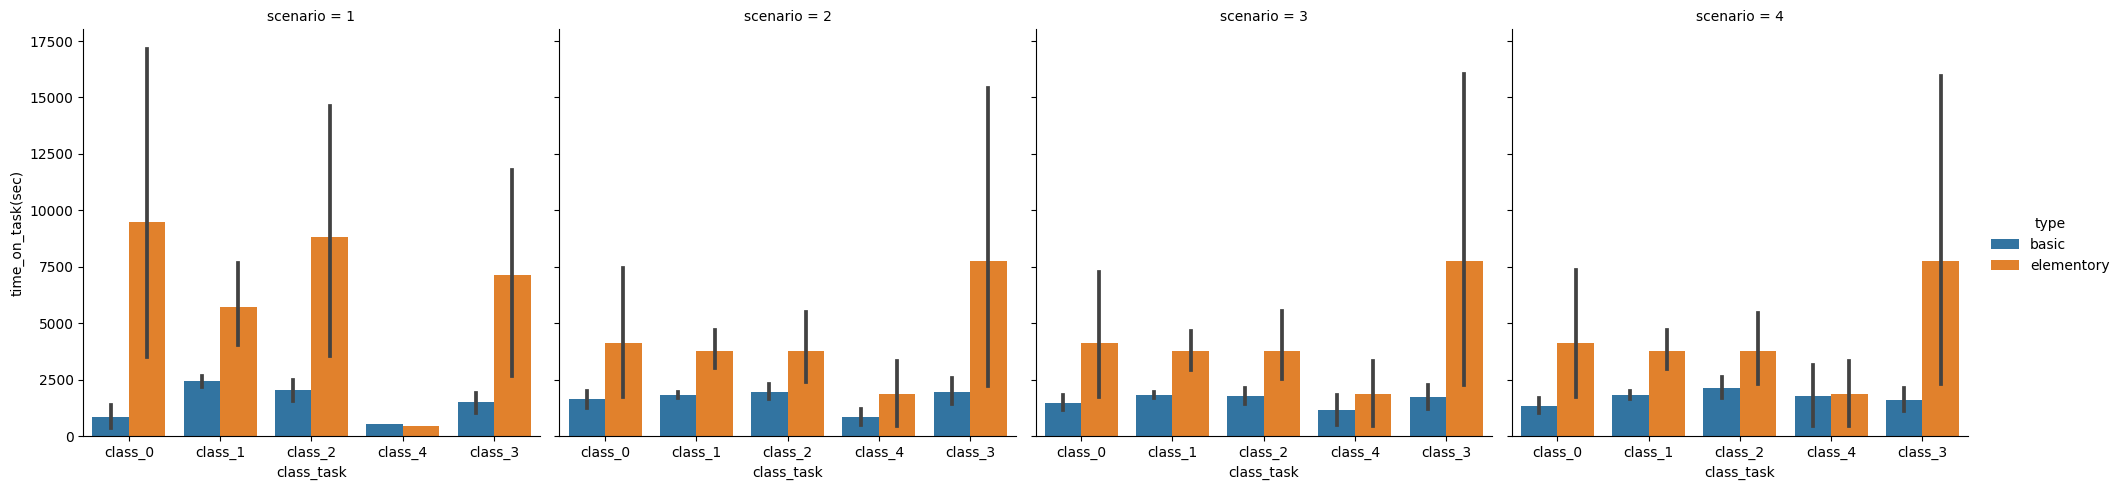

In [3]:
def calc_size(scenario):
    tasks=[0,600,46000,135000,387000,1200000] # max_calc_size из классов задач
    for i in range(len(tasks)-1):
        if (scenario['calc_size'] > tasks[i]) and (scenario['calc_size']<=tasks[i+1]):
            return f'class_{i}'
        
res_1=pd.concat([basic_1,elementary_1,basic_2,elementary_2,basic_3,elementary_3,basic_4,elementary_4])
res_1['class_task']=res_1.apply(calc_size, axis=1)

sns.catplot(x='class_task',
           y='time_on_task(sec)',
            kind='bar',
            hue='type',
            col='scenario',
            data=res_1)

График среднего времени выполнения задач для разных классов задач **(разной вычислительной сложности)** для 2-х скедулеров и 4-х сценариев. Basic-распределенный, elementary-нераспределенный.

#### Class_task на графике:
class_0: calc_size in the interval (0,600]

class_1: calc_size in the interval (600,46_000] 

class_2: calc_size in the interval (46_000,135_000]

class_3: calc_size in the interval (135_000,387_000] 

class_4: calc_size in the interval (387_000,1_200_000]

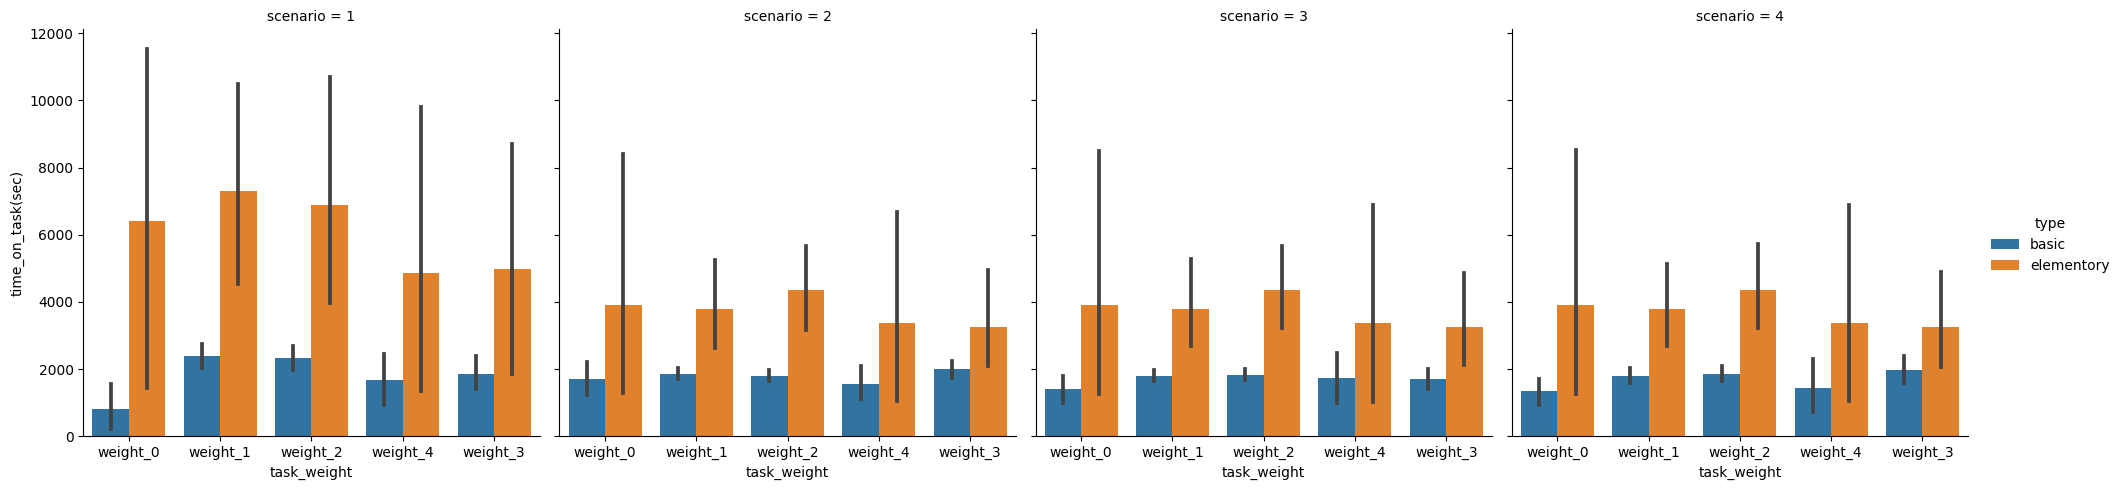

In [4]:
def transfer_weight(scenario):
    tasks=[0,10,30,60,100,200] # max_send_size из классов задач
    for i in range(len(tasks)-1):
        if (scenario['transfer_weight'] > tasks[i]) and (scenario['transfer_weight']<=tasks[i+1]) :
            return f'weight_{i}'

res_1['task_weight']=res_1.apply(transfer_weight, axis=1)
sns.catplot(x='task_weight',
           y='time_on_task(sec)',
            kind='bar',
            hue='type',
            col='scenario',
            data=res_1)

График среднего времени выполнения задач для разных классов задач **(разного веса в Мб)** для 2-х скедулеров и 4-х сценариев. Basic-распределенный, elementary-нераспределенный.

#### Task_weight на графике:
weight_0: transfer_weight in the interval (0,10]

weight_1: transfer_weight in the interval (10,30]

weight_2: transfer_weight in the interval (30,60]

weight_3: transfer_weight in the interval (60,100]

weight_4: transfer_weight in the interval (100,200]

In [5]:
def class_power_1(tasks):
    classes={1:1,2:7,3:8,4:6} # class_power для 1-ого сценария
    for i in classes:
        if tasks['customer_id'] == i:
            return classes[i]

def class_power_2_3_4(tasks):
    classes={1:1,2:2,3:3,4:3,5:4,6:4,7:5,8:5,9:6,10:6,11:7,12:8,13:8} # class_power для 2,3,4-ого сценария
    for i in classes:
        if tasks['customer_id'] == i:
            return classes[i]

basic_1['class_power']=basic_1.apply(class_power_1,axis=1)
elementary_1['class_power']=elementary_1.apply(class_power_1,axis=1)

basic_2['class_power']=basic_2.apply(class_power_2_3_4,axis=1)
elementary_2['class_power']=elementary_2.apply(class_power_2_3_4,axis=1)

basic_3['class_power']=basic_3.apply(class_power_2_3_4,axis=1)
elementary_3['class_power']=elementary_3.apply(class_power_2_3_4,axis=1)

basic_4['class_power']=basic_4.apply(class_power_2_3_4,axis=1)
elementary_4['class_power']=elementary_4.apply(class_power_2_3_4,axis=1)

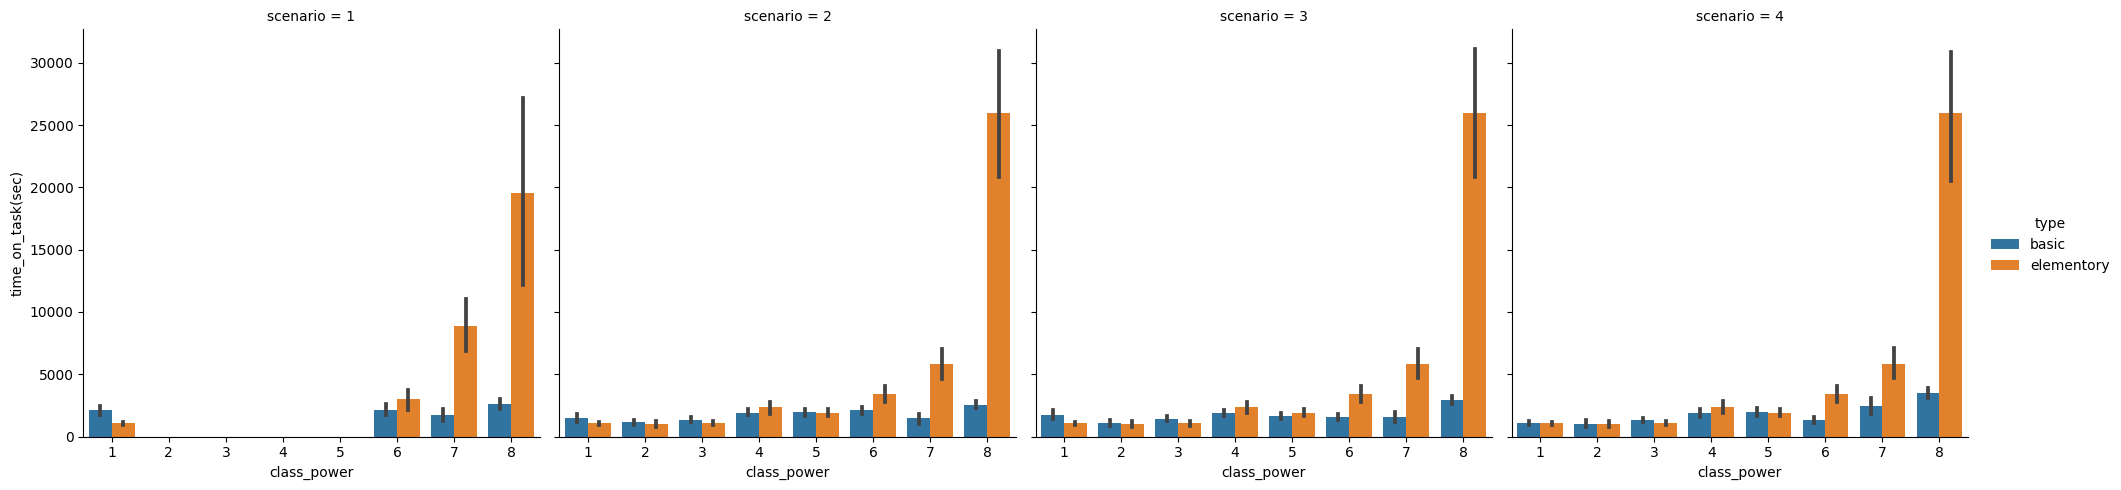

In [6]:
res_2=pd.concat([basic_1,elementary_1,basic_2,elementary_2,basic_3,elementary_3,basic_4,elementary_4])
sns.catplot(x='class_power',
           y='time_on_task(sec)',
            kind='bar',
            hue='type',
            col='scenario',
            data=res_2)

График среднего времени выполнения задач для **разных типов девайсов** для 2-х скедулеров и 4-х сценариев. Basic-распределенный, elementary-нераспределенный.

#### Class_power на графике:
1: ноутбук мощный

2: ноутбук средний

3: смартфон мощный

4: планшет средний

5: смартфон средний

6: смартфон бюджетный

7: смарт-телевизор

8: смарт-часы

In [7]:
print("\033[1m"+"\033[4mСOUNT OF COMPLETED TASKS:\033[0m")
print()

print("Time of simulation = 43_200_000 ms")
print()

print(f"Сount of completed tasks in 1 scenario (basic scheduler) = {len(basic_1['id'])}")
print(f"Сount of completed tasks in 1 scenario (elementary scheduler) ={len(elementary_1['id'])}")
print()

print(f"Сount of completed tasks in 2 scenario (basic scheduler) = {len(basic_2['id'])}")
print(f"Сount of completed tasks in 2 scenario (elementary scheduler) = {len(elementary_2['id'])}")
print()

print(f"Сount of completed tasks in 3 scenario (basic scheduler) = {len(basic_3['id'])}")
print(f"Сount of completed tasks in 3 scenario (elementary scheduler) = {len(elementary_3['id'])}")
print()

print(f"Сount of completed tasks in 4 scenario (basic scheduler) = {len(basic_4['id'])}")
print(f"Сount of completed tasks in 4 scenario (elementary scheduler) = {len(elementary_4['id'])}")

СOUNT OF COMPLETED TASKS:

Time of simulation = 43_200_000 ms

Сount of completed tasks in 1 scenario (basic scheduler) = 121
Сount of completed tasks in 1 scenario (elementary scheduler) =107

Сount of completed tasks in 2 scenario (basic scheduler) = 375
Сount of completed tasks in 2 scenario (elementary scheduler) = 349

Сount of completed tasks in 3 scenario (basic scheduler) = 361
Сount of completed tasks in 3 scenario (elementary scheduler) = 349

Сount of completed tasks in 4 scenario (basic scheduler) = 349
Сount of completed tasks in 4 scenario (elementary scheduler) = 349


In [8]:
print("\033[1m"+"\033[4mEFFECTIVENESS (CALC_SIZE/TIME_ON_TASK(sec)):\033[0m")
print()

effect_1=(basic_1['calc_size'].sum()/basic_1['time_on_task(sec)'].sum())/(elementary_1['calc_size'].sum()/elementary_1['time_on_task(sec)'].sum())
print(f"Effectiveness basic/elementary (scenario 1) = {effect_1}")

effect_2=(basic_2['calc_size'].sum()/basic_2['time_on_task(sec)'].sum())/(elementary_2['calc_size'].sum()/elementary_2['time_on_task(sec)'].sum())
print(f"Effectiveness basic/elementary (scenario 2) = {effect_2}")

effect_3=(basic_3['calc_size'].sum()/basic_3['time_on_task(sec)'].sum())/(elementary_3['calc_size'].sum()/elementary_3['time_on_task(sec)'].sum())
print(f"Effectiveness basic/elementary (scenario 3) = {effect_3}")

effect_4=(basic_4['calc_size'].sum()/basic_4['time_on_task(sec)'].sum())/(elementary_4['calc_size'].sum()/elementary_4['time_on_task(sec)'].sum())
print(f"Effectiveness basic/elementary (scenario 4) = {effect_4}")

EFFECTIVENESS (CALC_SIZE/TIME_ON_TASK(sec)):

Effectiveness basic/elementary (scenario 1) = 2.852807648258264
Effectiveness basic/elementary (scenario 2) = 2.054008787909672
Effectiveness basic/elementary (scenario 3) = 2.0456171025154295
Effectiveness basic/elementary (scenario 4) = 1.9265891826294204


In [9]:
print("\033[1m"+"\033[4mMEAN VALUE (TIME ON TASKS(sec)):\033[0m")
print()

print(f"Mean value of basic (1 scenario) = {basic_1['time_on_task(sec)'].mean()}")
print(f"Mean value of elementary (1 scenario) = {elementary_1['time_on_task(sec)'].mean()}")
print()

print(f"Mean value of basic (2 scenario) = {basic_2['time_on_task(sec)'].mean()}")
print(f"Mean value of elementary (2 scenario) = {elementary_2['time_on_task(sec)'].mean()}")
print()

print(f"Mean value of basic (3 scenario) = {basic_3['time_on_task(sec)'].mean()}")
print(f"Mean value of elementary (3 scenario) = {elementary_3['time_on_task(sec)'].mean()}")
print()

print(f"Mean value of basic (4 scenario) = {basic_4['time_on_task(sec)'].mean()}")
print(f"Mean value of elementary (4 scenario) = {elementary_4['time_on_task(sec)'].mean()}")

MEAN VALUE (TIME ON TASKS(sec)):

Mean value of basic (1 scenario) = 2156.702396694215
Mean value of elementary (1 scenario) = 6565.1857943925215

Mean value of basic (2 scenario) = 1832.660986666667
Mean value of elementary (2 scenario) = 3913.918911174785

Mean value of basic (3 scenario) = 1783.8513296398894
Mean value of elementary (3 scenario) = 3913.918911174785

Mean value of basic (4 scenario) = 1811.8696561604586
Mean value of elementary (4 scenario) = 3913.918911174785


In [10]:
print("\033[1m"+"\033[4m75 PRECENTAL (TIME ON TASKS(sec)):\033[0m")
print()

print(f"75 precental of basic (1 scenario) = {np.percentile(basic_1['time_on_task(sec)'] ,75)}")
print(f"75 precental of elementary (1 scenario) = {np.percentile(elementary_1['time_on_task(sec)'] ,75)}")
print()

print(f"75 precental of basic (2 scenario) = {np.percentile(basic_2['time_on_task(sec)'] ,75)}")
print(f"75 precental of elementary (2 scenario) = {np.percentile(elementary_2['time_on_task(sec)'] ,75)}")
print()

print(f"75 precental of basic (3 scenario) = {np.percentile(basic_3['time_on_task(sec)'] ,75)}")
print(f"75 precental of elementary (3 scenario) = {np.percentile(elementary_3['time_on_task(sec)'] ,75)}")
print()

print(f"75 precental of basic (4 scenario) = {np.percentile(basic_4['time_on_task(sec)'] ,75)}")
print(f"75 precental of elementary (4 scenario) = {np.percentile(elementary_4['time_on_task(sec)'] ,75)}")

75 PRECENTAL (TIME ON TASKS(sec)):

75 precental of basic (1 scenario) = 3325.78
75 precental of elementary (1 scenario) = 7744.46

75 precental of basic (2 scenario) = 2639.0299999999997
75 precental of elementary (2 scenario) = 3740.5

75 precental of basic (3 scenario) = 2563.35
75 precental of elementary (3 scenario) = 3740.5

75 precental of basic (4 scenario) = 2658.39
75 precental of elementary (4 scenario) = 3740.5


In [11]:
print("\033[1m"+"\033[4mDISPERSION (TIME ON TASKS(sec)):\033[0m")
print()

print(f"Dispersion of basic (scenario 1) = {basic_1['time_on_task(sec)'].var()}")
print(f"Dispersion of elementary (scenario 1) = {elementary_1['time_on_task(sec)'].var()}")
print()

print(f"Dispersion of basic (scenario 2) = {basic_2['time_on_task(sec)'].var()}")
print(f"Dispersion of elementary (scenario 2) = {elementary_2['time_on_task(sec)'].var()}")
print()

print(f"Dispersion of basic (scenario 3) = {basic_3['time_on_task(sec)'].var()}")
print(f"Dispersion of elementary (scenario 3) = {elementary_3['time_on_task(sec)'].var()}")
print()

print(f"Dispersion of basic (scenario 4) = {basic_4['time_on_task(sec)'].var()}")
print(f"Dispersion of elementary (scenario 4) = {elementary_4['time_on_task(sec)'].var()}")

DISPERSION (TIME ON TASKS(sec)):

Dispersion of basic (scenario 1) = 1529107.3413900412
Dispersion of elementary (scenario 1) = 89083787.23414536

Dispersion of basic (scenario 2) = 1095828.5738955478
Dispersion of elementary (scenario 2) = 52362317.78427238

Dispersion of basic (scenario 3) = 1140902.6363015606
Dispersion of elementary (scenario 3) = 52362317.78427238

Dispersion of basic (scenario 4) = 1704982.3505481577
Dispersion of elementary (scenario 4) = 52362317.78427238


In [12]:
print("\033[1m"+"\033[4mMAX AND MIN (TIME ON TASKS(sec)):\033[0m")
print()

print(f"Max value of basic (scenario 1) = {basic_1['time_on_task(sec)'].max()}")
print(f"Min value of basic (scenario 1) = {basic_1['time_on_task(sec)'].min()}")
print()

print(f"Max value of elementary (scenario 1) = {elementary_1['time_on_task(sec)'].max()}")
print(f"Min value of elemntary (scenario 1) = {elementary_1['time_on_task(sec)'].min()}")
print()

print(f"Max value of basic (scenario 2) = {basic_2['time_on_task(sec)'].max()}")
print(f"Min value of basic (scenario 2) = {basic_2['time_on_task(sec)'].min()}")
print()

print(f"Max value of elementary (scenario 2) = {elementary_2['time_on_task(sec)'].max()}")
print(f"Min value of elemntary (scenario 2) = {elementary_2['time_on_task(sec)'].min()}")
print()

print(f"Max value of basic (scenario 3) = {basic_3['time_on_task(sec)'].max()}")
print(f"Min value of basic (scenario 3) = {basic_3['time_on_task(sec)'].min()}")
print()

print(f"Max value of elementary (scenario 3) = {elementary_3['time_on_task(sec)'].max()}")
print(f"Min value of elemntary (scenario 3) = {elementary_3['time_on_task(sec)'].min()}")
print()

print(f"Max value of basic (scenario 4) = {basic_4['time_on_task(sec)'].max()}")
print(f"Min value of basic (scenario 4) = {basic_4['time_on_task(sec)'].min()}")
print()

print(f"Max value of elementary (scenario 4) = {elementary_4['time_on_task(sec)'].max()}")
print(f"Min value of elemntary (scenario 4) = {elementary_4['time_on_task(sec)'].min()}")

MAX AND MIN (TIME ON TASKS(sec)):

Max value of basic (scenario 1) = 3692.45
Min value of basic (scenario 1) = 0.03

Max value of elementary (scenario 1) = 43082.43
Min value of elemntary (scenario 1) = 0.72

Max value of basic (scenario 2) = 3884.43
Min value of basic (scenario 2) = 0.03

Max value of elementary (scenario 2) = 42875.4
Min value of elemntary (scenario 2) = 0.03

Max value of basic (scenario 3) = 4338.94
Min value of basic (scenario 3) = 0.03

Max value of elementary (scenario 3) = 42875.4
Min value of elemntary (scenario 3) = 0.03

Max value of basic (scenario 4) = 5474.43
Min value of basic (scenario 4) = 0.03

Max value of elementary (scenario 4) = 42875.4
Min value of elemntary (scenario 4) = 0.03
